In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from math import sqrt
import tensorflow as tf

import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [32]:
data = pd.read_csv("/content/train_data.csv")

In [33]:
data.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [34]:
data.shape

(813, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [36]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [37]:
data.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [38]:
data['Petrol (USD)'].min(),data['Petrol (USD)'].max()

(74.21, 189.51)

In [39]:
data = data.sort_values('Date').set_index('Date')

In [40]:
data.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [41]:
y = data['Petrol (USD)'].resample('MS').mean()

In [42]:
y['2017':]

Date
2017-01-01    118.6100
2017-02-01    120.1625
2017-03-01    119.2000
2017-04-01    117.4100
2017-05-01    116.4400
2017-06-01    115.2650
2017-07-01    113.8720
2017-08-01    115.6875
2017-09-01    118.2025
2017-10-01    117.2800
2017-11-01    119.0700
2017-12-01    119.9100
2018-01-01    120.9720
2018-02-01    120.8450
2018-03-01    119.2000
2018-04-01    120.7220
2018-05-01    125.2750
2018-06-01    128.0350
2018-07-01    127.2040
2018-08-01    128.5950
2018-09-01    130.2950
2018-10-01    130.5120
2018-11-01    128.0550
2018-12-01    121.6960
Freq: MS, Name: Petrol (USD), dtype: float64

# **Visualizing Petrol Price Time Series Data**

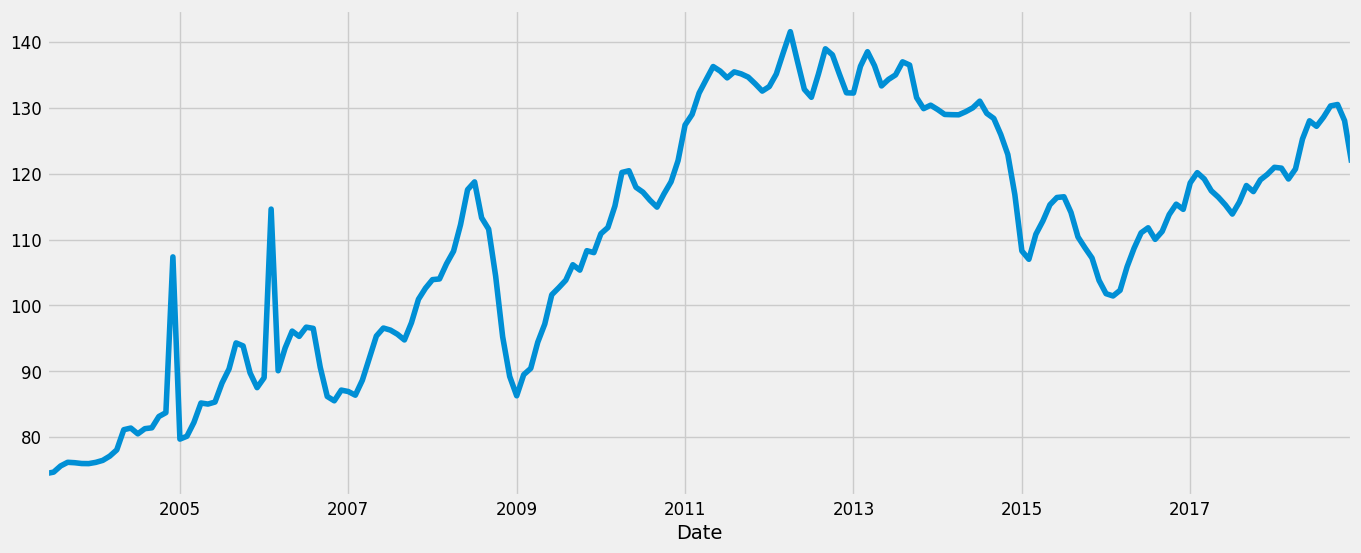

In [43]:
y.plot(figsize=(15, 6))
plt.show()

# **TREND, SEASONALITY AND NOISE**

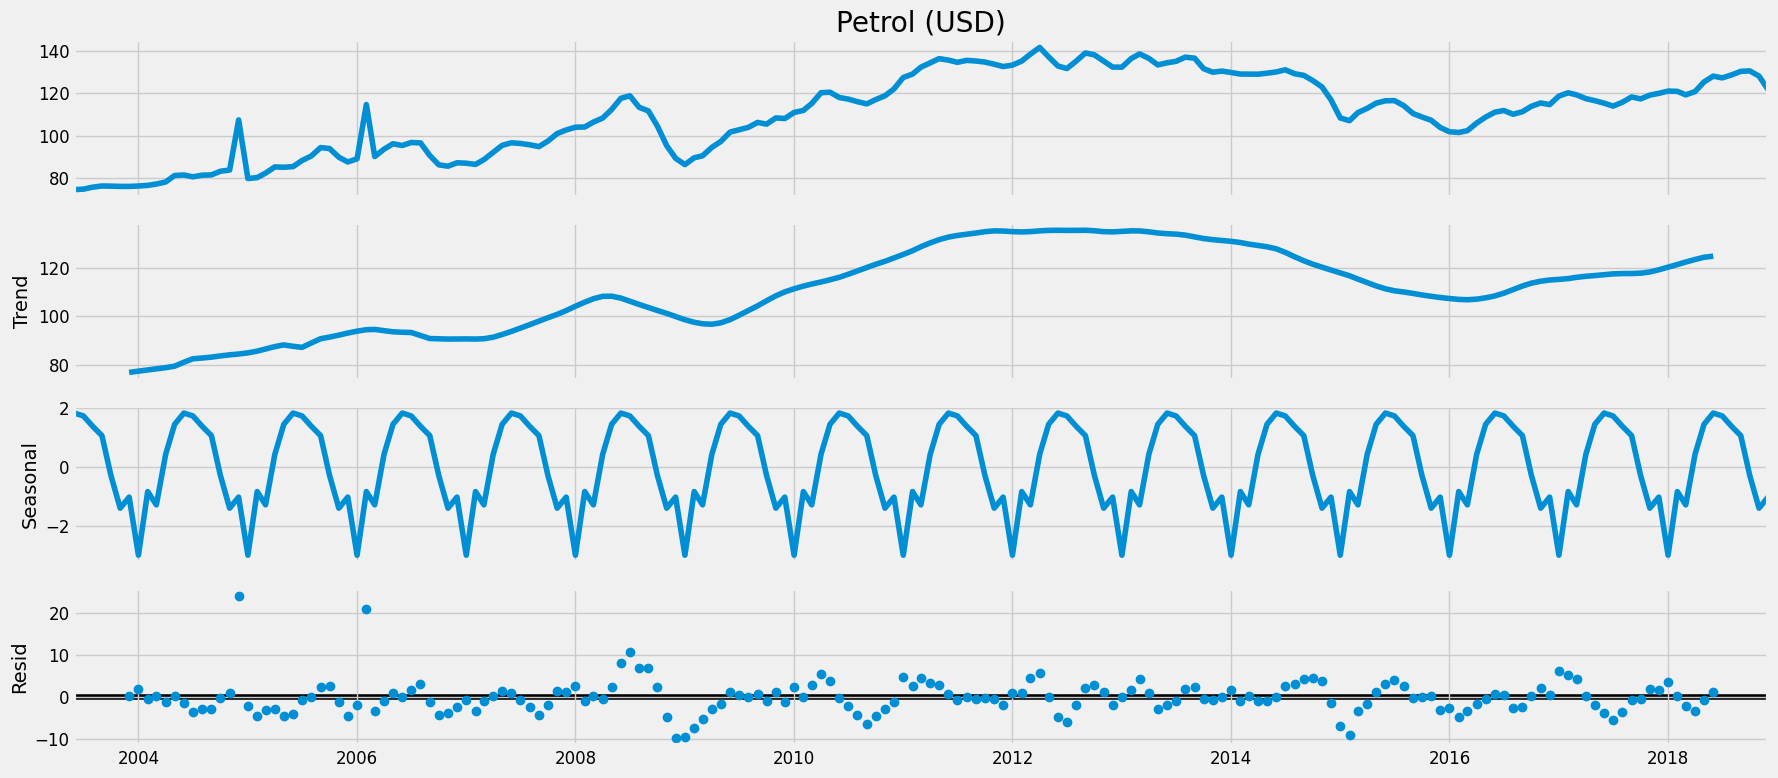

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

**We can clearly observe that there is an upward trend. And Prices has seasonality patterns, such as prices are always low at the beginning and at the end of the year**